**Classification: Logistic Regression, Multinomial Naive Bias (Compare on the same database)**

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



Logistic Regression Accuracy: 1.0
Multinomial Naive Bayes Accuracy: 0.9333333333333333

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Multinomial Naive Bayes Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



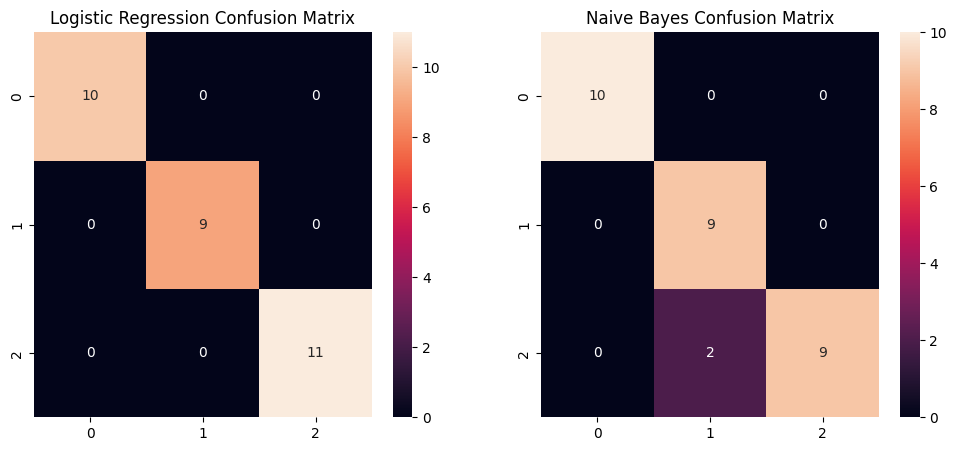

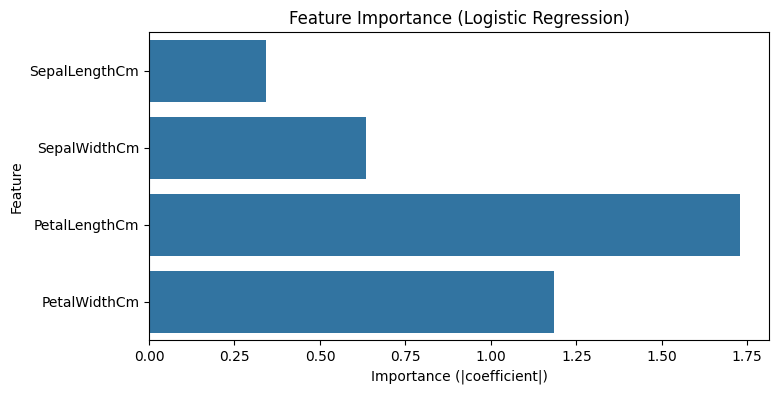

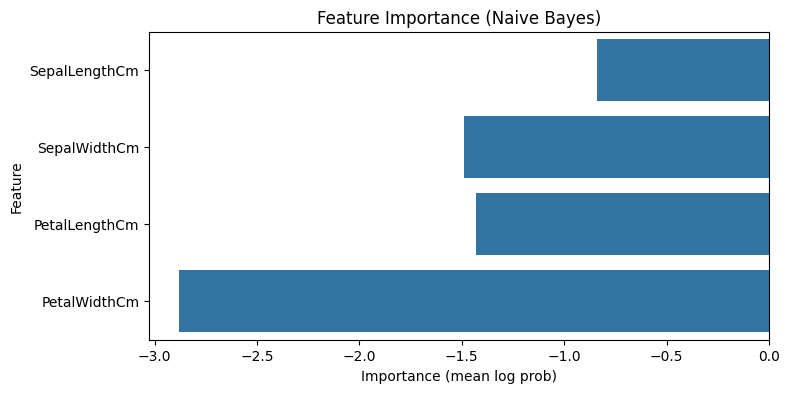

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset from the CSV file
df = pd.read_csv('iris.csv')

# 2. Check the first few rows of the dataset
print(df.head())

# 3. Define features and target
X = df.drop(columns=['Id', 'Species'])  # Drop 'Id' and 'Species' columns
y = df['Species']

# 4. Show feature distributions by class using pairplot
sns.pairplot(pd.concat([X, y], axis=1), hue='Species')
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

# 5. Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 8. Multinomial Naive Bayes (requires non-negative features)
X_train_nb = X_train - X_train.min().min()  # Shift to make all values non-negative
X_test_nb = X_test - X_train.min().min()    # Apply the same shift to the test set

nb = MultinomialNB()
nb.fit(X_train_nb, y_train)
y_pred_nb = nb.predict(X_test_nb)

# 9. Evaluation
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nMultinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# 10. Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, ax=axes[1])
axes[1].set_title('Naive Bayes Confusion Matrix')
plt.show()

# 11. Feature Importance (Logistic Regression)
importance_logreg = np.abs(logreg.coef_).mean(axis=0)
plt.figure(figsize=(8,4))
sns.barplot(x=importance_logreg, y=X.columns)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Importance (|coefficient|)")
plt.ylabel("Feature")
plt.show()

# 12. Feature Importance (Naive Bayes)
importance_nb = nb.feature_log_prob_.mean(axis=0)
plt.figure(figsize=(8,4))
sns.barplot(x=importance_nb, y=X.columns)
plt.title("Feature Importance (Naive Bayes)")
plt.xlabel("Importance (mean log prob)")
plt.ylabel("Feature")
plt.show()

**Classification: SVM, Random Forest (Compare on the same dataset using various performance matrices like acc, recall. Before that, show the distribution of data)**

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


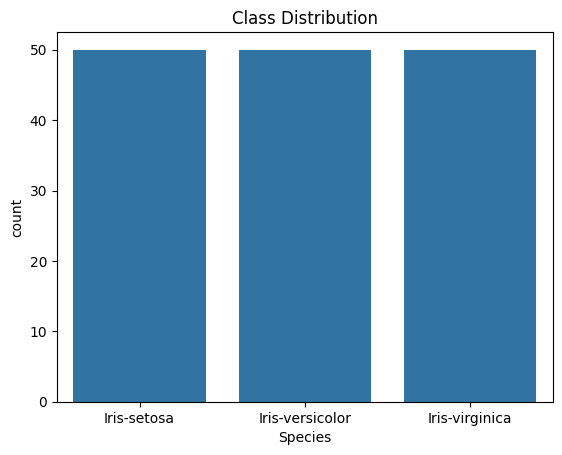

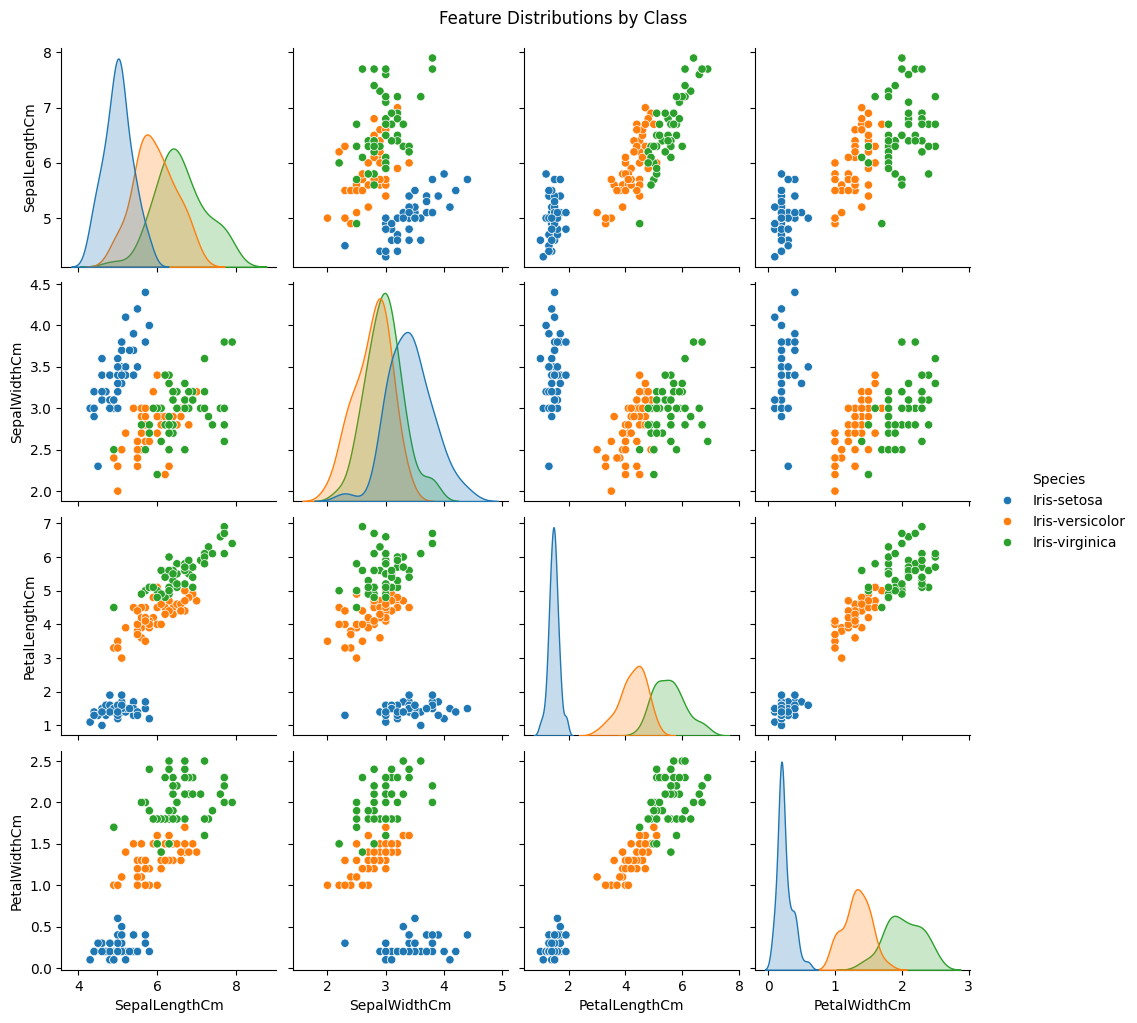


SVM Performance:
Accuracy: 0.9666666666666667
Recall: 0.9629629629629629
Precision: 0.9722222222222222
F1 Score: 0.9658994032395567
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


Random Forest Performance:
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00 

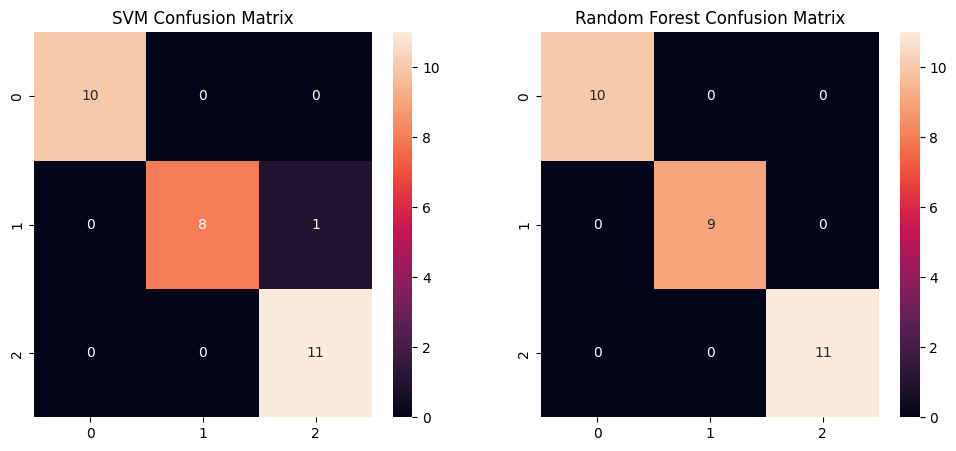

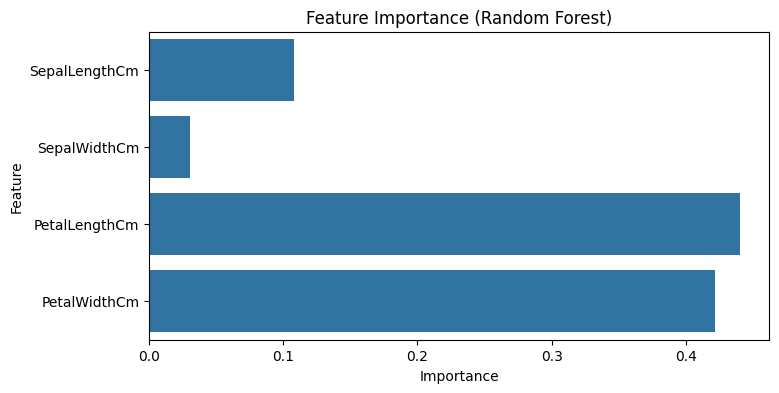

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris dataset from the CSV file
df = pd.read_csv('iris.csv')

# 2. Check the first few rows of the dataset
print(df.head())

# 3. Define features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])  # Drop 'Id' and 'Species' columns
y = df['Species']

# 4. Show class distribution
print("\nClass distribution:\n", y.value_counts())
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# 5. Visualize feature distributions
sns.pairplot(pd.concat([X, y], axis=1), hue='Species')
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# 9. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No scaling required for RandomForest
y_pred_rf = rf.predict(X_test)

# 10. Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# 11. Evaluate both models
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# 12. Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True,  ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
plt.show()

# 13. Feature Importance (Random Forest)
importances = rf.feature_importances_
feature_names = X.columns
    
# 14. Plot feature importance for Random Forest
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Clustering: K-Means and GMM (Comparison)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

# 1. Load the Iris dataset from the CSV file
df = pd.read_csv('iris.csv')

# 2. Check the first few rows of the dataset
print(df.head())

# 3. Define features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])  # Drop 'Id' and 'Species' columns
y = df['Species']  # Assign the target column

# 4. Apply PCA for dimensionality reduction (for visualization purposes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' based on your data
kmeans_labels = kmeans.fit_predict(X)

# 6. Gaussian Mixture Model (GMM) clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust 'n_components' based on your data
gmm_labels = gmm.fit_predict(X)

# 7. Evaluate both models (using Adjusted Rand Index)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)  # Adjusted Rand Index
gmm_ari = adjusted_rand_score(y, gmm_labels)
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.4f}")
print(f"GMM Adjusted Rand Index: {gmm_ari:.4f}")

# 8. Visualize the clusters using PCA components
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# K-Means visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, ax=axes[0], markers=["o", "s", "D"])
axes[0].set_title('K-Means Clusters')

# GMM visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, ax=axes[1], markers=["o", "s", "D"])
axes[1].set_title('GMM Clusters')

plt.show()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
K-Means Adjusted Rand Index: 0.7163
GMM Adjusted Rand Index: 0.9039


**PCA: Showing its performance**

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


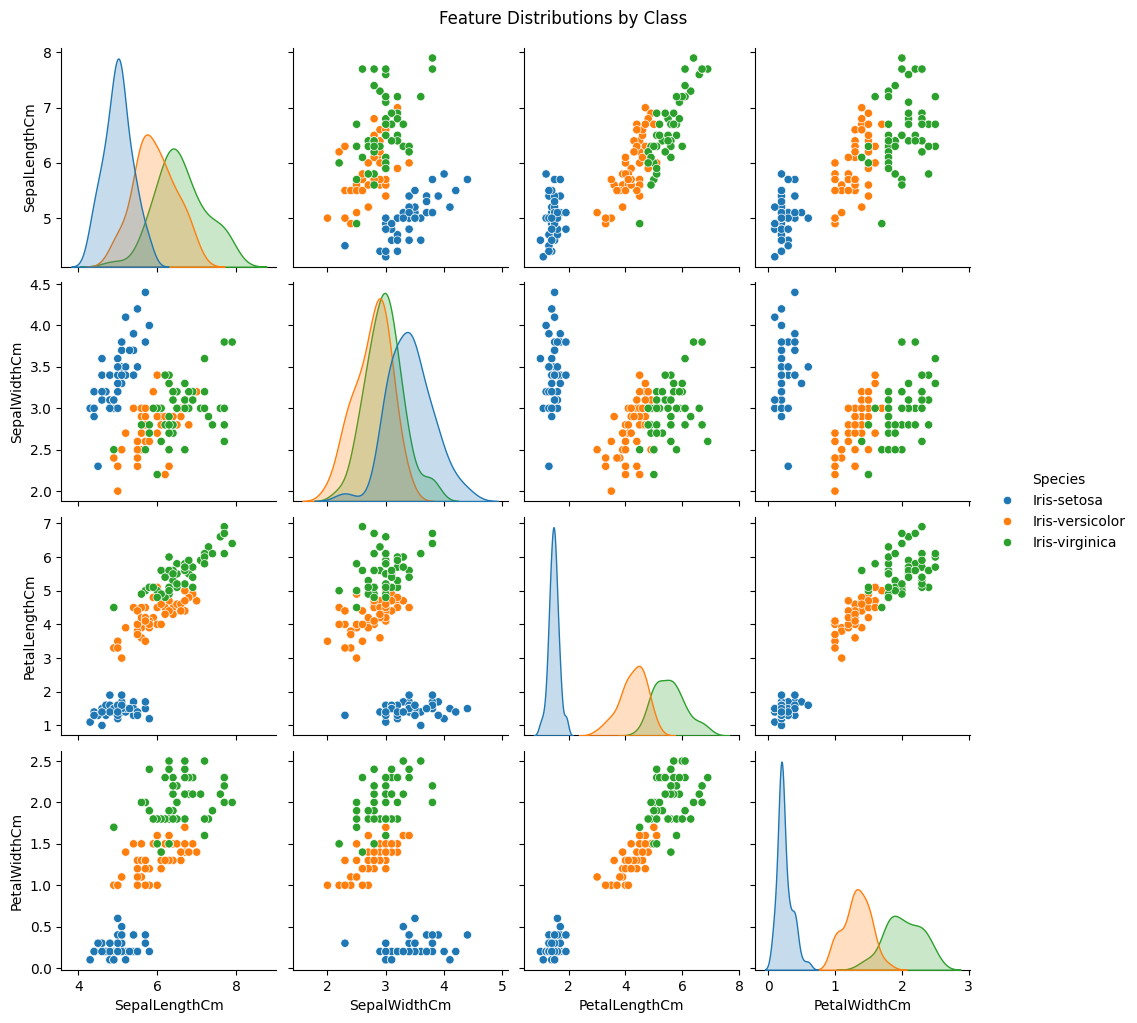

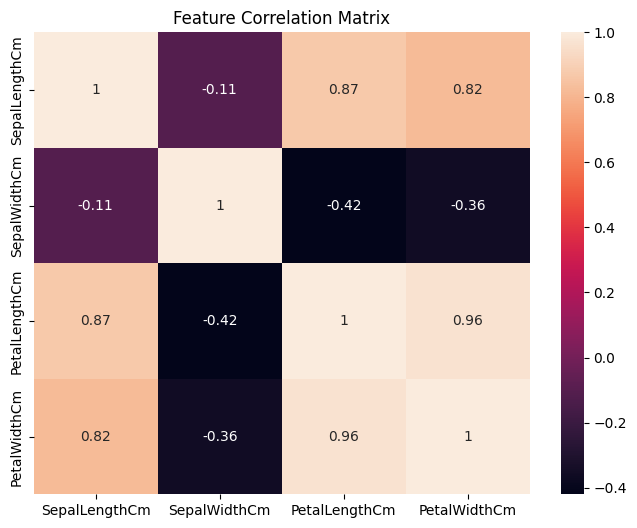

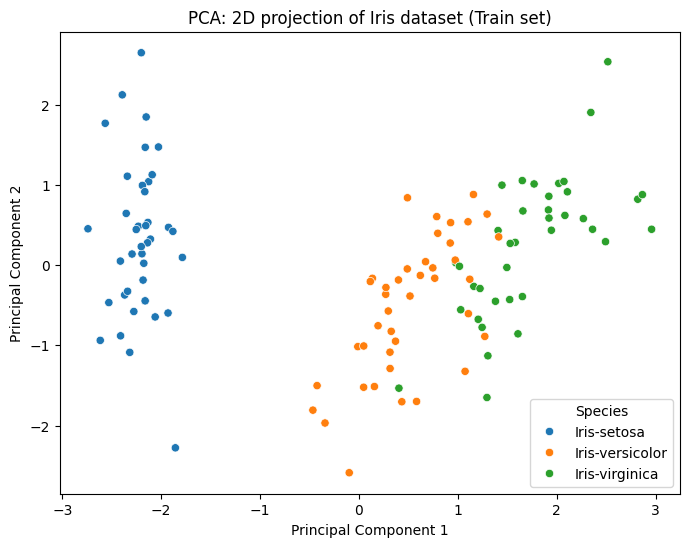

Accuracy without PCA: 1.0000
Accuracy with PCA: 0.9000


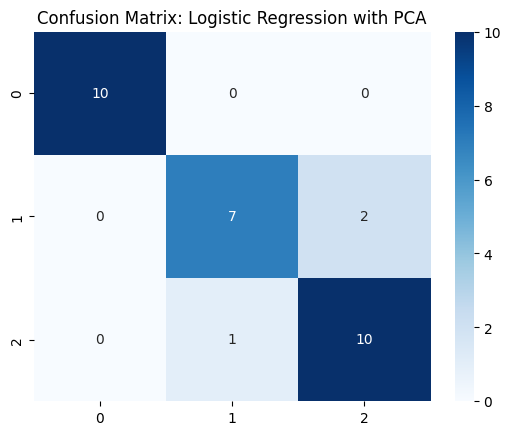

Explained variance ratio by each component: [0.72317687 0.23215265]
Total explained variance (for 2 components): 0.9553


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset from the CSV file
df = pd.read_csv('iris.csv')

# 2. Check the first few rows of the dataset
print(df.head())

# 3. Define features and target
X = df.drop(columns=['Id', 'Species'])  # Drop 'Id' and 'Species' columns
y = df['Species']

# 4. Show feature distributions by class using pairplot
sns.pairplot(pd.concat([X, y], axis=1), hue='Species')
plt.suptitle("Feature Distributions by Class", y=1.02)
plt.show()

# 5. Correlation matrix
corr_matrix = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

# 6. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Standardize the data (important for PCA and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 9. Visualize the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, markers=["o", "s", "D"])
plt.title('PCA: 2D projection of Iris dataset (Train set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

# 10. Logistic Regression without PCA
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# 11. Logistic Regression with PCA (using the 2 components from PCA)
logreg.fit(X_train_pca, y_train)
y_pred_logreg_pca = logreg.predict(X_test_pca)

# 12. Compare the performance of the Logistic Regression model with and without PCA
accuracy_no_pca = accuracy_score(y_test, y_pred_logreg)
accuracy_with_pca = accuracy_score(y_test, y_pred_logreg_pca)

# Print accuracy comparison
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")

# 13. Confusion Matrix for Logistic Regression (without PCA)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression without PCA')
plt.show()

# 14. Confusion Matrix for Logistic Regression (with PCA)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg_pca), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression with PCA')
plt.show()

# 15. Explained variance of the PCA components
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")
print(f"Total explained variance (for 2 components): {np.sum(pca.explained_variance_ratio_):.4f}")